# <center> <span style='color:#545c74'>Trabajo práctico módulos Numpy, Pandas y Matplotlib</span></center>

Trabajo práctico.

**Profesor Adjunto:** Mag. Bioing. Baldezzari Lucas

<p style='text-align: left;'> V2022 </p>

<hr style="border:1px solid #545c74"> </hr>

# <span style='color:#157FE9'>Introducción del Trabajo Práctico</span>

En el siguiente Trabajo Práctico (TP) se implementará, en primer lugar, un algoritmo conocido como *k*-means. Luego implementará un detector de picos para señales de ECG. Finalmente utilizará el detector de picos para quedarse con trozos de una señal de ECG y utilizando el algoritmo de *k*-means agrupará latidos cardíacos.

**Importante**:
- Para resolver el TP planteado se debe utilizar <span style="background-color: #aa0033; color:#ffffff">**solamente**</span> las librerías presentadas en las clases de los módulos Numpy, Pandas y Matplotlib. <span style="background-color: #aa0033; color:#ffffff">**NO**</span> se pueden utilizar librerias como Scikitlearn, Tensorflow, Scipy, OpenCV o cualquier otra que tenga implementados los algoritmos que aquí se solicitan.
- Las implementaciones deben evitar el uso de bucles innecesarios cuando éstos puedan realizarse mediante operaciones vectorizadas (recordar *np.vectorize*). Por ejemplo, recorrer pedazos o *chunks* de la señal de ECG utilizando bucles, consume recursos que pueden ser optimizados mediante operaciones vectorizadas cuando trabajamos con numpy.

## <span style='color:#157FE9'>Ejercicio 1: *k*-means</span>

*k*-means es un algoritmo de agrupamiento o *clustering* no supervisado (los clusters no poseen una etiqueta o referencia) que agrupa patrones en $k$ grupos basándose en sus características.

El agrupamiento se realiza minimizando la suma entre la distancias de cada patrón (o punto) al *centroide* de su grupo o *cluster*.

Un <mark>*centride*</mark> es simplemente un punto o patrón dentro de un grupo que se encuentra en el **centro** del mismo, de ahí su nombre. Para calcular la distancia de un centroide a puntos/patrones cercanos se suele usar la distancia *euclídea*.

El algoritmo de *k*-means consta de tres pasos:

1. **Inicialización**: una vez escogido la cantidad de clusters, *k*, se establecen *k* centroides $\boldsymbol\mu_{i}$ en el espacio de los datos. Una posibilidad es elegir los centroides *aleatoriamente*, o bien proponiendo sus ubicaciones dentro del espacio que forman los datos.
2. **Asignación de patrones a los centroides**: cada patrón $\mathbf{x}_{j}$ de los datos es asignado al centroide $\boldsymbol\mu_{i}$ más cercano.
3. **Actualización de centroides**: se actualiza la posición de cada centroide, $\boldsymbol\mu_{i}$ de cada grupo $S_i$, tomando como nuevo centroide la posición dada por el promedio de los patrones pertenecientes a dicho grupo $\mathbf{x}_{j} \in S_i$.

Se repiten los pasos 2 y 3 hasta que los centroides no cambian entre iteraciones, o cambian por debajo de una distancia umbral en cada paso.

El algoritmo *k*-means resuelve un problema de optimización. En este algoritmo la función a optimizar (minimizar) corresponde a <mark>*la suma de las distancias cuadráticas de cada patrón al centroide de su cluster*</mark>.

Los patrones ($\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n$) se representan como vectores reales con $d$ dimensiones ($\mathbf{x}_j \in \mathcal{R}^d$) y el algoritmo *k*-means construye *k* grupos $\mathbf{S}=\{S_1, S_2, \dots, S_k\}$ donde se minimiza la suma de distancias de los patrones $\mathbf{x}_{j} \in S_i$ a su centroide $\boldsymbol\mu_{i}$. Por lo tanto, la función que se busca minimizar, conocida como <mark>*función de costo*</mark> es:

$$f_{costo} = \sum_{i=1}^{k} \sum_{\mathbf x_j \in S_i} \left\| \mathbf x_j - 
\boldsymbol\mu_i \right\|^2$$

La actualización de los centroides para la iteración $t+1$ se realiza en base a los agrupamientos dados en la iteración $t$:

$$\boldsymbol{\mu}_{i}^{t+1} = \frac{1}{\vert S_{i}^{t} \vert} \displaystyle\sum_{\mathbf{x}_{j} \in S_{i}^{t}} \mathbf{x}_{j}$$

Cuando $\boldsymbol{\mu}_{i}^{t+1} $ no cambia se considera que el algoritmo ha convergido.
    
Ms información acerca del algoritmo en:

- [K-medias](https://es.wikipedia.org/wiki/K-medias)
- [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer)
- [K. MEANS CLUSTERING](https://www.youtube.com/watch?v=EZOab1vkFmI&ab_channel=AprendeIAconLigdiGonzalez)
- [K Means Clustering EN ESPAÑOL ➤ SOLO 5 PASOS! ](https://www.youtube.com/watch?v=2kfY0R34Dy0&ab_channel=AprendeInnovando)

### <span style='color:#bc435d'>Parte A</span>

En base a lo mencionado anteriormente, se solicita.

1. Construya una clase llamada *Kmeans*. A continuación se deja una muesta del contenido (mínimo) de la clase.

```python
class Kmeans():
    
    def __init__(self, nClusters:int = 2, maxIter:int = 300):
        """
        Constructor de clase.
        Args:
            - nClusters (int): Cantidad de clusters/grupos a encontrar
            - maxIter (int): número máximo de iteraciones a realizar para encontrar los cluster.
        """
        self.nClusters = nClusters
        self.maxIter = maxIter

    def fit(self, datos):
        """
        El método fit toma datos e para intentar encontrar nClusters.
        Argumentos:
            - datos (numpy.array): Patrones/Datos/Puntos con los cuales se buscarán clusters.
        """
        self.centroides = None
        self.etiquetas = None
        
        ## Implementar algoritmo de clustering
        ___
```

**Comentarios**

<u>Acerca del constructor</u>

El atributo `self.maxIter = maxIter` define la cantidad máxima de iteraciones a realizar. Recuerde que el algoritmo de *k*-means es iterativo y podría darse el caso que nunca converga ya que sería posible encontrar valores en nuestro set de datos que provoquen que los centroides cambien constantemente. Por esta razón, debe ponerse un límite de iteraciones.

<u>Acerca del método *fit()*</u>

El método `Kmeans.fit(datos)` recibe un `array` de datos (patrones/puntos) y debe encontrar *k* centroides y, a partir de estos, obtener un array de etiquetas, formado por valores enteros desde $0$ hasta $k-1$. Cada valor numérico (etiqueta) representa un grupo dentro del set de datos.

Veamos un ejemplo utilizando uno de los set de datos a ser usado en este TP.

In [66]:
import pandas as pd

data = pd.read_csv(f"datos/dataClusters/2. data_cumulos.csv") #cargo datos
data.head()

,x1,x2
0,5.867498,8.177152
1,5.613700,9.932955
2,7.225084,10.448862
3,6.762823,0.605145
4,8.016182,1.543147


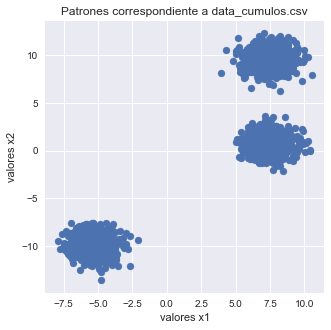

In [67]:
import matplotlib.pyplot as plt

## es preferible trabajar con numpy.arrays
x1 = data["x1"].values
x2 = data["x2"].values

# plt.style.available #vemos los estilos disponibles
plt.style.use("seaborn")

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x1,x2)
ax.set_xlabel("valores x1")
ax.set_ylabel("valores x2")
ax.set_title("Patrones correspondiente a data_cumulos.csv")

plt.show()

Podemos notar que los datos dentro de *data_cumulos.csv* podrían formar tres grupos o cluster.

A continuación se muestra una imágen con el resultado de aplicar la clase *Kmeans* (implementado por el profesor) al set de datos anterior con $nClusters=3$.

In [68]:
from Kmeans import Kmeans
import numpy as np

datos = np.asarray([x1,x2]).T
print(datos.shape)

k3 = Kmeans(nClusters=3, maxIter = 100) #obtengo un objeto Kmeans

k3.fit(datos) #alimento el objeto con los datos

centroides = k3.centroides
etiquetas = k3.etiquetas

(1500, 2)


In [69]:
print(centroides)
print(etiquetas[:30])
print(etiquetas.shape)

[[ 7.41429427  0.67834951]
 [-5.31738211 -9.81080765]
 [ 7.47871593  9.43027105]]
[2 2 2 0 0 0 2 0 1 0 2 2 2 2 2 1 1 1 2 1 0 1 2 2 0 2 0 0 0 0]
(1500,)


Podemos ver que luego de hacer `k3.fit(datos)` obtenemos tres centroides. Además se ha obtenido un array de etiquetas que contiene valores de 0 a 2 corresponiente a los valores de grupo que se asignaron a cada punto dentro de `datos`.

Ahora grafiquemos un scatter plot usando las etiquetas como codificadores de colores en el set de datos para ver si hemos podido separar los datos en tres grupos.

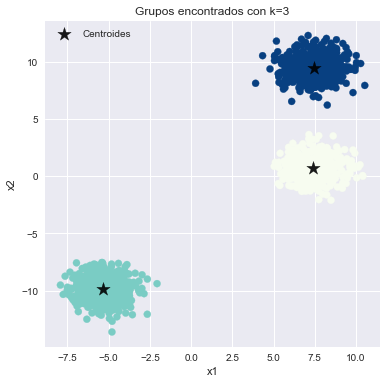

In [70]:
fig, ax = plt.subplots(figsize = (6,6))

labels = ["G1", "G2", "G3"]
ax.scatter(datos[: , 0], datos[: , 1], c = etiquetas, zorder = 2.0, cmap='GnBu', s = 50)
ax.scatter(centroides[: , 0], centroides[: , 1], zorder = 2, alpha=0.9,
           s = 200,marker = "*", label = "Centroides", c="k")

ax.set_title("Grupos encontrados con k=3")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.legend()
plt.show()

Podemos ver que utilizando la codificación de colores con las etiquetas (haciendo `c = etiquetas` en `ax.scatter(...)`) encontradas mediante la función `Kmeans.fit()` hemos logrado discriminar tres grupos diferentes.

Además de la selección aleatoria de centroides que se hace al inicio del algoritmo de *k*-means podríamos definir centroides iniciales.

En el caso del método `fit()` aquí implementado, se le puede pasar como parámetro una lista con numpy arrays con los centroides iniciales utilizando `centroidesIniciales`.

Veamos.

In [71]:
## Definimos los centroides. Son 3 ya que tenemos k=3
c1 = np.array([-5., -10.])
c2 = np.array([7.5, 1.])
c3 = np.array([7.5, 10.])

In [72]:
k3.fit(datos, centroidesIniciales = [c3,c2,c1]) #alimento el objeto con los datos

centroides = k3.centroides
etiquetas = k3.etiquetas

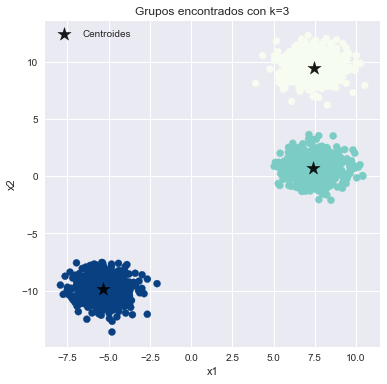

In [73]:
fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(datos[: , 0], datos[: , 1], c = etiquetas, zorder = 2.0, cmap='GnBu', s = 50)
ax.scatter(centroides[: , 0], centroides[: , 1], zorder = 2, alpha=0.9,
           s = 200,marker = "*", label = "Centroides", c="k")

ax.set_title("Grupos encontrados con k=3")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.legend()
plt.show()

### <span style='color:#bc435d'>Parte B</span>

Una vez haya implementado su clase *Kmeans* evalúe su funcionamiento para cada set de datos dentro de *datos/dataClusters*, para diferentes valores de `nClusters` (desde $k=2$ hasta $k=6$).

Debe generar gráficas, usando Matplotlib de tal forma de ver en un subplot los datos sin agrupar y en otro subplot los datos agrupados (en una misma figura). Agregue etiquetas a los ejes x e y, y un título adecuado.

### <span style='color:#bc435d'>Parte C</span>

Analice y discuta los resultados obtenidos en cada conjunto de datos. ¿Cómo funcionó su implementación? ¿Sirve para cualquiera de los datos que hay en los archivos dentro de *datos/dataClusters*?

## <span style='color:#157FE9'>Ejercicio 2: Detección de latidos</span>

Dada una señal unidimensional $x[n]$ correspondiente a un canal del electrocardiograma (ECG), la búsqueda de los latidos suele ser una etapa importante para el análisis de la señal.

Un algoritmo simple para la detección latidos consiste en la búsqueda de los picos *R* del complejo *QRS* mediante una ventana deslizante.

Para ello se pueden realizar los siguientes asos en cada trozo de señal ventaneada $x_i[n]$ (con $i$ siendo el indice de la ventana):

1. Restar la media al trozo de señal $x_i[n]$
2. Aplicar un clipado (*corte*) en amplitud, para eliminar (o hacer cero) las variaciones menores dentro de la ventana 
   ($x[n]=0, \; \forall{n} \text{ tal que } |x[n]| < umbral$).
3. Buscar el máximo en la señal clipada de $x_i[n]$.
4. Si existe un máximo, guardar la posición como un QRS. Caso contrario, la ventana no contiene QRS.

**Señal de ECG**

En este TP trabajará con los primeros 10 minutos de la señal *100.dat* de la base de datos del [MIT-BIH Arrythmia Database](https://physionet.org/content/mitdb/1.0.0/). El archivo a utilizar se llama *100_10min_filtered.npy* y encuentra dentro las carpetas *\datos\ecg*.

##### Ejemplo

En las siguientes líneas de códigose presenta ejemplos de lo que se espera (implementación del profesor).

In [48]:
## importo funciones de librería utils
from utils import pasaBanda, notch, plotECG, peakDetection, plotSeveralECG, splitECG

#cagamos señal
with open("datos/ecg/100_10min_filtered.npy", "rb") as f:
    ecg = np.load(f)

# frecuencia muestreo
fm = 360.
ecg.shape

(108000,)

En el ejemplo debajo se muestra la detección de picos en un pequeño tramo de la señal de ECG.

In [49]:
##seleccionamos la señal entre los segundos 130 y 150.
iniTime = 130. #secs
finalTime = 150. #secs

shortECG = ecg[int(iniTime*fm):int(finalTime*fm)]

**Detectando picos**

A continuación se utiliza la función `peakDetection()` (implementada por el profesor) para detectar los picos del ECG según el algoritmo mencionado anteriormente.

In [50]:
std = np.std(shortECG)
threshold = 3*std #selecciono un umbral de 3 veces el desvío estándar.

peaks, indexes, heartRate =  peakDetection(shortECG, window = 1.0, threshold = threshold,
                            fm = fm, startingIndex = int(0*fm)) 

Vemos que la función `peakDetection()` recibe la señal de ECG, una ventana temporal que se deslizará sobre la señal de eCG, un umbral y la frecuencia de muestreo de la señal.

Utilice el ejemplo anterior como una guía para realizar su propia función de detección de picos mediante el algoritmo mencionado anteriormente.

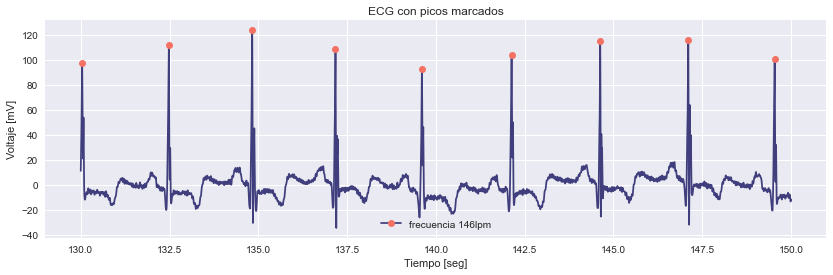

In [52]:
### Graficamos el trozo de ECG
plotECG(shortECG, fm = 360., iniTime = iniTime, finalTime = finalTime,
        markers = indexes, label = f"frecuencia {int(heartRate)}lpm",figsize = (14,4),
        title = "ECG con picos marcados", savePlots = False, folder = "figs")   

Notar que la función `plotECG()` recibe entre otras cosas, la señal de ECG a graficar, la ventana temporal a donde graficar (la cual sirve para generar el eje x donde se muestran los segundos) y los `markers`, los cuales sirven para generar los marcadores (puntos en color naranja sobre los picos de la onda R), entre otros datos.

Utilice esta idea como guía para generar su propia función de graficación.

### <span style='color:#bc435d'>Parte A</span>

Implemente una función llamada *ecgPeakDetection()* que implemente el algoritmo de detección de picos y pruébelo con señal *100_10min_filtered.npy* (que se encuentra en *datos\ecg*) la cual contiene los primeros 5 minutos de la señal *100.dat* del conjunto de datos MIT-BIH Arrythmia Database (mitdb).

Algunos datos importantes de la señal.

- Frecuencia de muestreo: 360
- Longitud de la señal: 108000 valores de voltaje.
- Unidades: mV.

<mark>La función debe devolver un arreglo unidimensional con la posición (índice dentro de la señal) de los picos encontrados.</mark>

#### <span style='color:#00435d'>Latidos por minutos</span></center>

¿Cual es la frecuencia, en *latidos por minuto* de la señal de ECG? Puede obtener esta información a partir de conocer los picos de la señal.

### <span style='color:#bc435d'>Parte B</span>

Utilizando distintos tamaños de ventana y umbral de clipado en su función *ecgPeakDetection()*, grafique un trozo de la señal de ECG ubicando los puntos donde se detectaron picos (similar a la gráfica de ECG mostrada anteriormente).

## <span style='color:#157FE9'>Ejercicio 3: Agrupando latidos</span>

Utilizando el algoritmo de *k*-means implementado en el ejercicio 1 agrupe los latidos y grafíquelos solapados como se muestra en el ejemplo de implementación más abajo.

<mark>Realice agrupamientos desde $k = 2$ a $k=4$.</mark>

**NOTA**: Se espera que pueda obtener algo similar (o mejor).

Para utilizar *k*-means con los latidos, debe recortar, **con un tamaño de ventana fijo** alrededor de cada QRS detectado (elija el mejor detector del punto 2B). Con esto obtendrá $M$ trozos de señales con el complejo QRS en el centro. 

Finalmente, debe pasar a su algoritmo de *k*-means los trozos de complejos QRS.

**Recomendaciones**

- Optimice su código utilizando funciones para resolver los ejercicios aquí planteados. Por ejemplo, podría implementar una función *splitECG()* que tome como entradas la señal de ECG, los índices detectados por la función *ecgPeakDetection()*, el tamaño de ventana (en segundos) y la frecuencia de muestreo y devuelva un array con los trozos o *splits*.
- Podría crear una o más funciones para graficar, de esta manera, ahorrará código.

En resumen, intente optimizar y ahorrar líneas de codificación.

### <span style='color:#5543ff'>Ejemplo de *agrupamiengo* de latidos</span></center>

A continuación se muestra un ejemplo de agrupamiento de latidos utilizando la clase `Kmeans()`.

Lo primero que hacemos es obtener los picos de la onda $R$ y los índices donde estos se ubican a partir de la señal `ecg`.

Para esto se implementó una función llamada `peakDetection()`.

In [58]:
iniTime = 0.
peaks, indexes, heartRate =  peakDetection(ecg, window = 1.0, threshold = threshold,
                                           fm = fm, startingIndex = int(iniTime*fm)) 

Analicemos un poco los datos obtenidos.

In [59]:
print(f"Cantidad de picos {peaks.shape}, algunos valores en mV de los picos son {peaks[:4]}")
print(f"Cantidad de indexes {indexes.shape}, algunos posiciones de los índices son {indexes[:4]}")
print(f"La frecuencia cardíaca detectada es {heartRate}")

Cantidad de picos (129,), algunos valores en mV de los picos son [118.2643333   91.36777041 105.02366563 114.50077458]
Cantidad de indexes (129,), algunos posiciones de los índices son [ 224 1100 1979 2832]
La frecuencia cardíaca detectada es 139.28776041666669


A continuacion vamos a **trozar** el ECG a partir de los picos y los índices encontrados en el punto anterior con una ventana de $0.6$ segundos.

Se implementó una función `splitECG()` para obtener señales de ECG recortadas con los picos QRS centrados.

In [60]:
#Ventana seleccionada
splitWindow = 0.6 #segundos

splittedecg = splitECG(ecg, peakIndexes = indexes, splitWindow = splitWindow, fm = fm)
print(f"Froma de splittedecg, {splittedecg.shape}")
print(f"Cantidad de trozos {splittedecg.shape[0]}, con {splittedecg.shape[1]} muestras por cada trozo.")

Froma de splittedecg, (129, 216)
Cantidad de trozos 129, con 216 muestras por cada trozo.


La función `splittedecg` recibe la señal ECG a trozar, los índices donde se detectaron los picos, el tamaño de ventana y la frecuencua de muestreo, a partir de estos datos, devuelve un array de tamaño $recortes \times muestras$, donde la cantidad de muestras depende de la frecuencia de muestreo de la señal y del tamaño de la ventana.

En el ejemplo anterior vemos que la ventana utilizada fue `splitWindow = 0.6`, lo cual multiplicada por la frecuencia de muestre nos da $0.6 \times 360 = 216$ muestras.

Es <mark>**importante**</mark> entender que la ventana en este caso sirve para determinar el ancho, en segundos, en el cual se tomará la señal de ECG con el pico de la onda $R$ como centro.
    
La siguiente figura muestra un esquema de cómo se utiliza la ventana temporal con la idea de obtener trozos de ECG con la onda $R$ en el centro.

<img src="figs/ventanas.png" width="740"/>

##### Creando objeto Kmeans()

Ahora que tenemos los trozos de ECG, pasamos a agrupar latidos.

Para esto creamos un objeto `Kmeans()` con la idea de formar tres grupos de latidos.

In [61]:
ecgCluster = Kmeans(nClusters = 3)

Ahora vamos a utilizar el método `Kmeans.fit()` para obtener los centroides (latidos) y las etiquetas para cada trozo.

In [62]:
ecgCluster.fit(splittedecg)

Analicemos un poco los datos que hemos obtenido luego de hacer `.fit()`

In [63]:
print(f"Cantidad de centroides {ecgCluster.centroides.shape[0]},\
con {ecgCluster.centroides.shape[1]} muestras por centroide")

print(f"Cantidad de etiquetas {ecgCluster.etiquetas.shape}")
print(f"Algunos valores de las etiquetas para cada latido {ecgCluster.etiquetas[:10]}")

Cantidad de centroides 3,con 216 muestras por centroide
Cantidad de etiquetas (129,)
Algunos valores de las etiquetas para cada latido [2 1 1 1 1 1 2 2 2 1]


##### Graficando los centroidres

A continuación graficamos los centroides obtenidos. Recodar que los centroides <mark>son simplemente latidos cardíacos que han sido tomados como "centros" en base al algoritmo de `Kmeans()`.</mark>

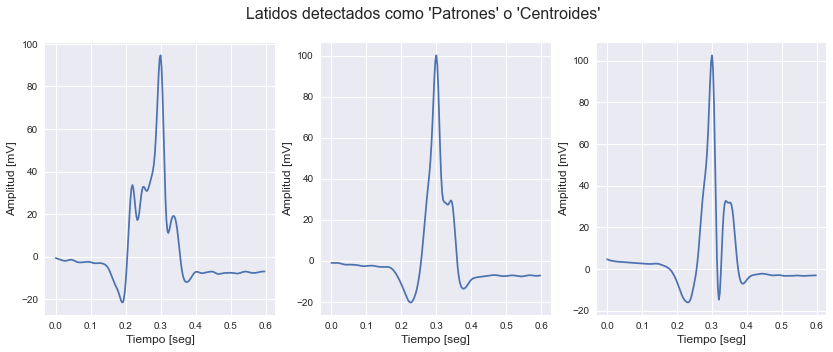

In [64]:
plotSeveralECG(ecgCluster.centroides, labels = np.unique(ecgCluster.etiquetas),
               fm = 360., rows = 1, columns = 3 iniTime = 0., finalTime = 0., markers = [],
               title = "Latidos detectados como 'Patrones' o 'Centroides'",
               figsize = (14,5), savePlots = False)

Finalmente graficamos todos los latidos de nuestra señañ agrupados según las etiquetas obtenidas en `ecgCluster.etiquetas`.

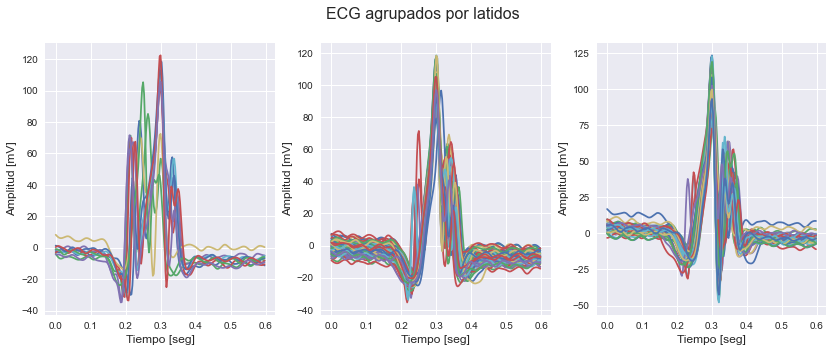

In [65]:
plotSeveralECG(splittedecg, labels = ecgCluster.etiquetas, fm = 360., rows = 1, columns = 3,
                    iniTime = 0., finalTime = 0.,markers = [], title = "ECG agrupados por latidos",
                    savePlots = False, figsize = (14,5),)

### <span style='color:#bc435d'>Acerca del informe final</span>

- <span style="background-color: #aa0033; color:#ffffff">Se debe entregar **un informe**</span> utilizando una Jupyter Notebook mostrando la implementación de cada ejercicio.
- <span style="background-color: #aa0033; color:#ffffff">Se debe **explicar**</span> qué se hizo y cómo se hizo. Se evaluará la calidad de la presentación, la escritura y el nivel de detalle en la explicación.
- El informe debe tener <span style="background-color: #aa0033; color:#ffffff">una sección de **conclusión y discusión**</span>. ¿Qué opina de su implementación del algoritmo de `Kmeans()`? ¿Puede agrupar correctamente los latidos? ¿Qué se podría hacer para mejorar los resultados? Una alternativa a *k*-means es [*k*-medoids](https://es.wikipedia.org/wiki/K-medoids). ¿En qué podría ser útil la utilización de su algoritmo?

<hr style="border:1px solid #545c74"> </hr>

# <center> <span style='color:#545c74'>FIN</span></center>